In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
import math

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

data = pd.read_csv('stud_math.xls')
display(data.head(10))
data.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

In [4]:
data_no_score = data[data.score == 0] #data.query('score == 0')

In [5]:
data[data.score == 0].index

Int64Index([128, 130, 131, 134, 135, 136, 137, 140, 144, 146, 148, 150, 153,
            160, 162, 168, 170, 173, 221, 239, 242, 259, 264, 269, 296, 310,
            316, 332, 333, 334, 337, 341, 343, 367, 383, 387, 389],
           dtype='int64')

In [6]:
data = data.drop(data[data.score == 0].index)

In [7]:
data_no_score

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,NaN,no,yes,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


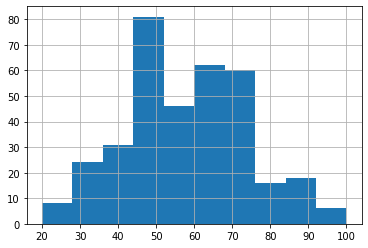

In [8]:
data.score.hist()

In [9]:
data.score.min()

20.0

In [10]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [11]:
# math.isnan(data.Pstatus[1]) проверка на нан
# data.at[0,'sex'] = 'SFH' замена конкретного элемента в фрейме
#data.loc[372]

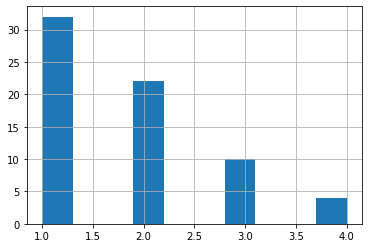

In [12]:
#смотрю  на время пути городских и деревенских до школы 
#traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
data[data.address == 'R'].traveltime.hist() #за городом

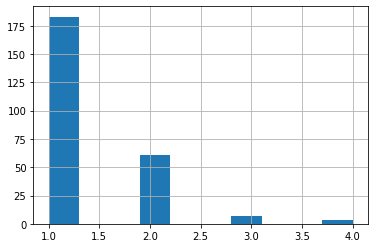

In [13]:
data[data.address == 'U'].traveltime.hist() #городские

In [14]:
print('за городом:\n', data[data.address == 'R'].traveltime.value_counts(), '\n\nгородские:\n',
data[data.address == 'U'].traveltime.value_counts())

за городом:
 1.0    32
2.0    22
3.0    10
4.0     4
Name: traveltime, dtype: int64 

городские:
 1.0    183
2.0     61
3.0      7
4.0      3
Name: traveltime, dtype: int64


In [15]:
R = 0
U = 0
for i in range(1, 5):
    R += data[data.address == 'R'].traveltime.value_counts()[i]*i
    U += data[data.address == 'U'].traveltime.value_counts()[i]*i
R /= data[data.address == 'R'].traveltime.value_counts().sum()
U /= data[data.address == 'U'].traveltime.value_counts().sum()
print('Среднее время пути городских/деревенских', round(U, 2), round(R, 2))

Среднее время пути городских/деревенских 1.33 1.79


In [16]:
for i in data[data.address.isna()].index:
    if not np.isnan(data.traveltime.loc[i]):
        if abs(data.traveltime.loc[i] - R) < abs(data.traveltime.loc[i] - U):
            data.at[i,'address'] = 'R'
        else:
            data.at[i,'address'] = 'U'

In [17]:
data[data.address.isna()].index

Int64Index([241, 348, 372], dtype='int64')

In [18]:
data.traveltime[241]

nan

In [19]:
for i in data[data.traveltime.isna()].index:
    if not data.address.isna().loc[i]:
        if data.address.loc[i] == 'R':
            data.at[i,'traveltime'] = R
        elif data.address.loc[i] == 'U':
            data.at[i,'traveltime'] = U
data[data.address.isna()].index == data[data.traveltime.isna()].index

array([ True,  True,  True])

In [20]:
data = data.drop(data[data.address.isna()].index)
data[data.address.isna()].index

Int64Index([], dtype='int64')

In [21]:
#sns.jointplot(x = 'goout', y = 'score', data = data, kind = 'reg')

In [22]:
#correlation = data[['goout', 'score']].corr()
#sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

In [23]:
#data.drop(['goout'], axis='columns', inplace=True)

In [24]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [25]:
#correlation = data[['freetime', 'score']].corr()
#sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
#print(sns.jointplot(x = 'freetime', y = 'score', data = data, kind = 'reg'))

In [26]:
data = data.drop(data[data.score.isna()].index)
data[data.score.isna()].index

Int64Index([], dtype='int64')

In [27]:
#data.drop(['freetime'], axis='columns', inplace=True)

In [28]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


### Гистограммы для всех оставшихся численных переменных

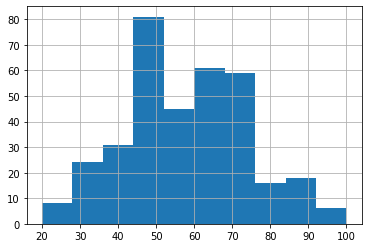

In [29]:
data.score.hist()

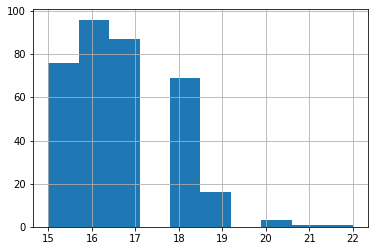

In [30]:
data.age.hist()

2.0 2.0 4.0 
Границы выбросов:  -1.0 7.0


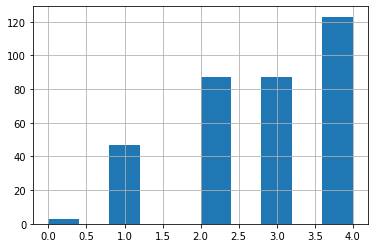

In [31]:
data.Medu.hist()
Medu_median = data.Medu.median()
Medu_IQR = data.Medu.quantile(0.75) - data.Medu.quantile(0.25)
Medu_Q25 = data.Medu.quantile(0.25)
Medu_Q75 = data.Medu.quantile(0.75)

print(
    Medu_IQR,
    Medu_Q25,
    Medu_Q75,
'\nГраницы выбросов: ', Medu_Q25 - 1.5*Medu_IQR, Medu_Q75 + 1.5*Medu_IQR)

data[data.Medu < 0.5].index
#Ввиду того, что есть всего три строки данных со значением < 0.5, я считаю их выбросами
data = data.drop(data[data.Medu < 0.5].index)

1.0 2.0 3.0 
Границы выбросов:  0.5 4.5


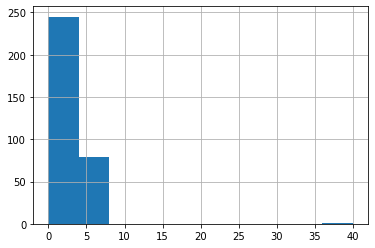

In [32]:
data.Fedu.hist()
Fedu_median = data.Fedu.median()
Fedu_IQR = data.Fedu.quantile(0.75) - data.Fedu.quantile(0.25)
Fedu_Q25 = data.Fedu.quantile(0.25)
Fedu_Q75 = data.Fedu.quantile(0.75)
print(
    Fedu_IQR,
    Fedu_Q25,
    Fedu_Q75,
'\nГраницы выбросов: ', Fedu_Q25 - 1.5*Fedu_IQR, Fedu_Q75 + 1.5*Fedu_IQR)

#Математически большие выбросы начинаются от 4.5. Исходя из графика буду считать 10

data = data.drop(data[data.Fedu > 10].index)
data = data.drop(data[data.Fedu < 0.5].index)

1.0 1.0 2.0 
Границы выбросов:  -0.5 3.5


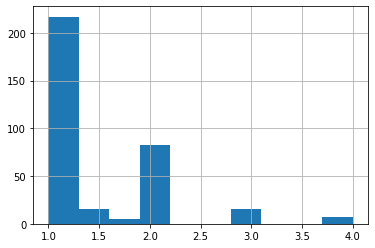

In [33]:
data.traveltime.hist()

TrTime_median = data.traveltime.median()
TrTime_IQR = data.traveltime.quantile(0.75) - data.traveltime.quantile(0.25)
TrTime_Q25 = data.traveltime.quantile(0.25)
TrTime_Q75 = data.traveltime.quantile(0.75)
print(
    TrTime_IQR,
    TrTime_Q25,
    TrTime_Q75,
'\nГраницы выбросов: ', TrTime_Q25 - 1.5*TrTime_IQR, TrTime_Q75 + 1.5*TrTime_IQR)

1.0 1.0 2.0 
Границы выбросов:  -0.5 3.5


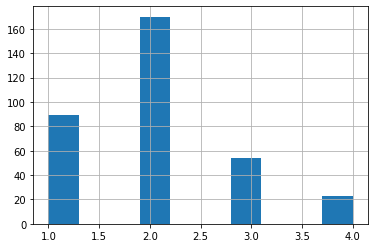

In [34]:
data.studytime.hist()
STime_median = data.studytime.median()
STime_IQR = data.studytime.quantile(0.75) - data.studytime.quantile(0.25)
STime_Q25 = data.studytime.quantile(0.25)
STime_Q75 = data.studytime.quantile(0.75)
print(
    STime_IQR,
    STime_Q25,
    STime_Q75,
'\nГраницы выбросов: ', STime_Q25 - 1.5*STime_IQR, STime_Q75 + 1.5*STime_IQR)
#Значения больше 3.5 не стану считать выбросами, так как они не отличаются от данных других групп данных принципиально

AxesSubplot(0.125,0.125;0.775x0.755)


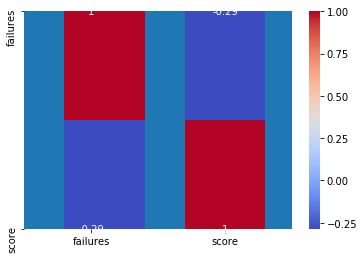

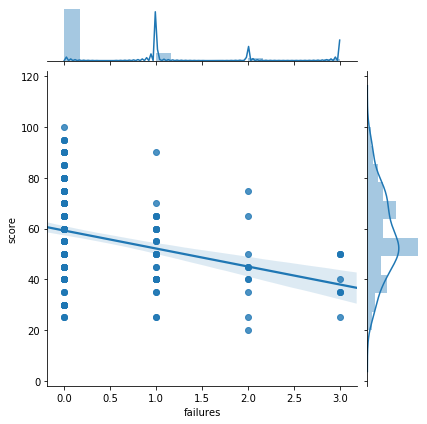

In [35]:
print(data.failures.hist())
correlation = data[['failures', 'score']].corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
print(sns.jointplot(x = 'failures', y = 'score', data = data, kind = 'reg'))
#Согласно гистограмме есть значения, похожие на выбросы, но убирать ничего не буду, так как имеется некая корреляция (0.29), а
#также даже количество учеников в самой малой группе data[data.failures > 2.5] довольно существенно

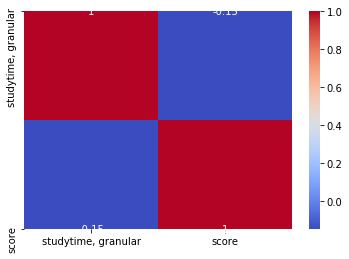

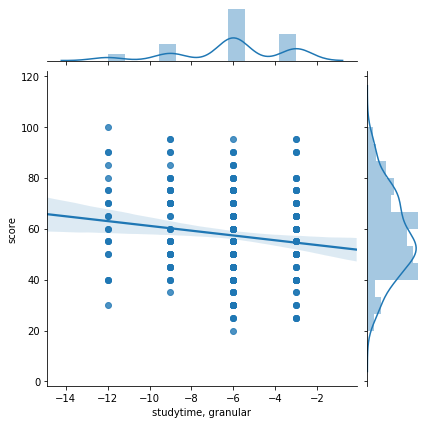

In [36]:
data['studytime, granular'].hist()
correlation = data[['studytime, granular', 'score']].corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
print(sns.jointplot(x = 'studytime, granular', y = 'score', data = data, kind = 'reg'))
#studytime, granular не заявлен в задании и не сказано, что тут за данные и какой смысл они имеют. Ввиду ещё и низкой 
#корреляции (0.15) с результатами тестов (score) решил удалить этот столбец
data.drop(['studytime, granular'], axis='columns', inplace=True)

1.0 4.0 5.0 
Границы выбросов:  2.5 6.5


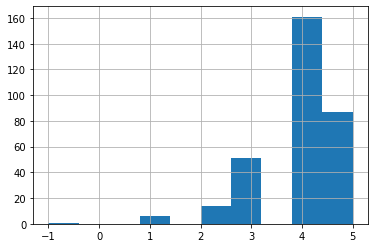

In [37]:
data.famrel.hist()
Famrel_median = data.famrel.median()
Famrel_IQR = data.famrel.quantile(0.75) - data.famrel.quantile(0.25)
Famrel_Q25 = data.famrel.quantile(0.25)
Famrel_Q75 = data.famrel.quantile(0.75)
print(
    Famrel_IQR,
    Famrel_Q25,
    Famrel_Q75,
'\nГраницы выбросов: ', Famrel_Q25 - 1.5*Famrel_IQR, Famrel_Q75 + 1.5*Famrel_IQR)
#Значение -1 является некорректным с точки зрения описания задания. Вероятно - ошибка в данных. Заменю на 1.
#Исходя из графика и достаточно большого количества данных, отрезаемых математическими выбросами, не буду ничего удалять
data.at[25,'famrel'] = 1

2.0 3.0 5.0 
Границы выбросов:  0.0 8.0


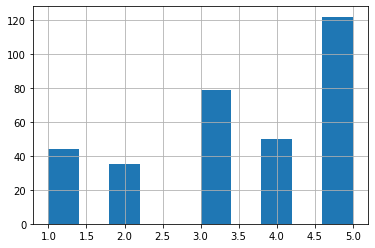

In [38]:
data.health.hist()
#Графически выбросов не видно. Проверю:
Health_median = data.health.median()
Health_IQR = data.health.quantile(0.75) - data.health.quantile(0.25)
Health_Q25 = data.health.quantile(0.25)
Health_Q75 = data.health.quantile(0.75)
print(
    Health_IQR,
    Health_Q25,
    Health_Q75,
'\nГраницы выбросов: ', Health_Q25 - 1.5*Health_IQR, Health_Q75 + 1.5*Health_IQR)
#Действительно нет

7.0 2.0 9.0 
Границы выбросов:  -8.5 19.5


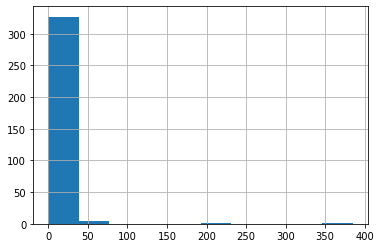

In [39]:
data.absences.hist()
Abs_median = data.absences.median()
Abs_IQR = data.absences.quantile(0.75) - data.absences.quantile(0.25)
Abs_Q25 = data.absences.quantile(0.25)
Abs_Q75 = data.absences.quantile(0.75)
print(
    Abs_IQR,
    Abs_Q25,
    Abs_Q75,
'\nГраницы выбросов: ', Abs_Q25 - 1.5*Abs_IQR, Abs_Q75 + 1.5*Abs_IQR)
#Есть выбросы data[data.absences > 19.5] всего 21 ученик. Удаляю.
data = data.drop(data[data.absences > 19.5].index)

Оставим так

In [40]:
data = data.drop(236)

In [41]:
#Пропуски в образовании матери заполняем самым часто встречающимся значением, так как их (пропусков) всего три
data.Medu = data.Medu.fillna(data.Medu.mode()[0])
data[data.Medu.isna()].index

Int64Index([], dtype='int64')

In [42]:
#Пропуски в образовании отцов заполняем медианой (Их существенно больше пяти)
data.Fedu = data.Fedu.fillna(data.Fedu.median())
data[data.Fedu.isna()].index

Int64Index([], dtype='int64')

In [43]:
#Пропуски в studytime заполню медианой
data.studytime = data.studytime.fillna(data.studytime.median())
data[data.studytime.isna()].index

Int64Index([], dtype='int64')

In [44]:
#Пропуски в failures заполню медианой
data.failures = data.failures.fillna(data.failures.median())
data[data.failures.isna()].index

Int64Index([], dtype='int64')

In [45]:
#Пропуски в famrel заполню медианой
data.famrel = data.famrel.fillna(data.famrel.median())
data[data.famrel.isna()].index

Int64Index([], dtype='int64')

In [46]:
#Пропуски в health заполню медианой
data.health = data.health.fillna(data.health.median())
data[data.health.isna()].index

Int64Index([], dtype='int64')

In [47]:
#Пропуски в absences заполню медианой
data.absences = data.absences.fillna(data.absences.median())
data[data.absences.isna()].index

Int64Index([], dtype='int64')

In [48]:
#Пропуски в остальных столбцах заполним модой
data.goout = data.goout.fillna(data.goout.mode())
data[data.goout.isna()].index

data.freetime = data.freetime.fillna(data.freetime.mode())
data[data.freetime.isna()].index

#Все пропуски убраны. В данных пропусков больше нет (числовые столбцы)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Осталось убрать пропуски в номинативных переменных. Они есть во всех столбцах, начиная с famsize. В номинативных переменных буду заполнять модой.

In [49]:
data.famsize = data.famsize.fillna(data.famsize.mode()[0])
data[data.famsize.isna()].index

Int64Index([], dtype='int64')

In [50]:
data.Pstatus = data.Pstatus.fillna(data.Pstatus.mode()[0])
data[data.Pstatus.isna()].index

Int64Index([], dtype='int64')

In [51]:
data.Mjob = data.Mjob.fillna(data.Mjob.mode()[0])
data[data.Mjob.isna()].index

Int64Index([], dtype='int64')

In [52]:
data.Fjob = data.Fjob.fillna(data.Fjob.mode()[0])
data[data.Fjob.isna()].index

Int64Index([], dtype='int64')

In [53]:
data.reason = data.reason.fillna(data.reason.mode()[0])
data[data.reason.isna()].index

Int64Index([], dtype='int64')

In [54]:
data.guardian = data.guardian.fillna(data.guardian.mode()[0])
data[data.guardian.isna()].index

Int64Index([], dtype='int64')

In [55]:
data.schoolsup = data.schoolsup.fillna(data.schoolsup.mode()[0])
data[data.schoolsup.isna()].index

Int64Index([], dtype='int64')

In [56]:
data.famsup = data.famsup.fillna(data.famsup.mode()[0])
data[data.famsup.isna()].index

Int64Index([], dtype='int64')

In [57]:
data.paid = data.paid.fillna(data.paid.mode()[0])
data[data.paid.isna()].index

Int64Index([], dtype='int64')

In [58]:
data.activities = data.activities.fillna(data.activities.mode()[0])
data[data.activities.isna()].index

Int64Index([], dtype='int64')

In [59]:
data.nursery = data.nursery.fillna(data.nursery.mode()[0])
data[data.nursery.isna()].index

Int64Index([], dtype='int64')

In [60]:
data.higher = data.higher.fillna(data.higher.mode()[0])
data[data.higher.isna()].index

Int64Index([], dtype='int64')

In [61]:
data.internet = data.internet.fillna(data.internet.mode()[0])
data[data.internet.isna()].index

Int64Index([], dtype='int64')

In [62]:
data.romantic = data.romantic.fillna(data.romantic.mode()[0])
data[data.romantic.isna()].index

Int64Index([], dtype='int64')

In [63]:
data
#Больше пропусков в данных нет

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,no,yes,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,yes,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


### Проверяем численные столбцы на корреляцию с итоговым баллом за экзамен

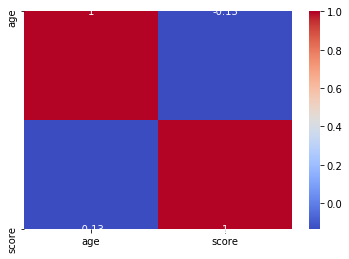

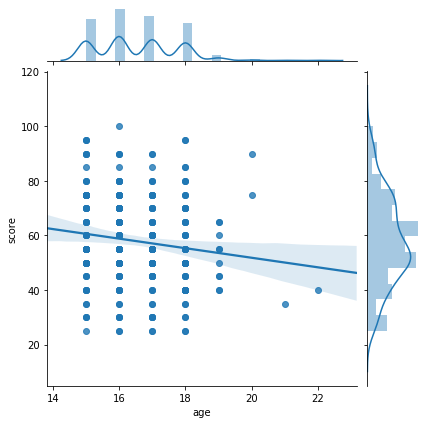

In [64]:
correlation = data[['age', 'score']].corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
print(sns.jointplot(x = 'age', y = 'score', data = data, kind = 'reg'))

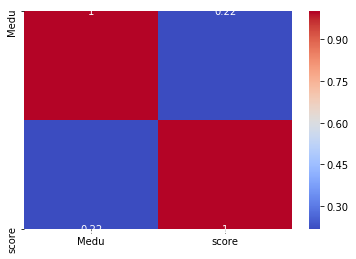

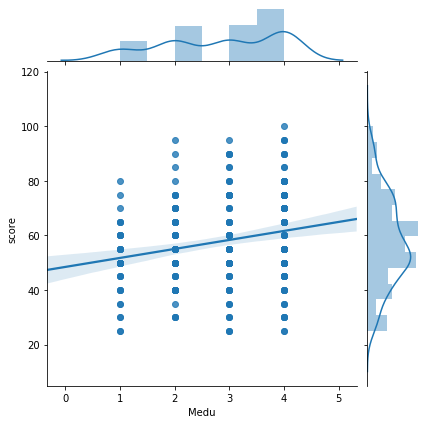

In [65]:
correlation = data[['Medu', 'score']].corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
print(sns.jointplot(x = 'Medu', y = 'score', data = data, kind = 'reg'))

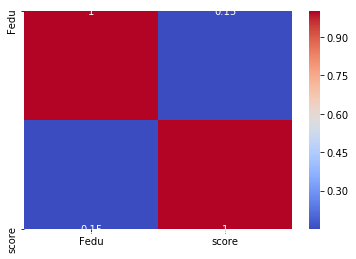

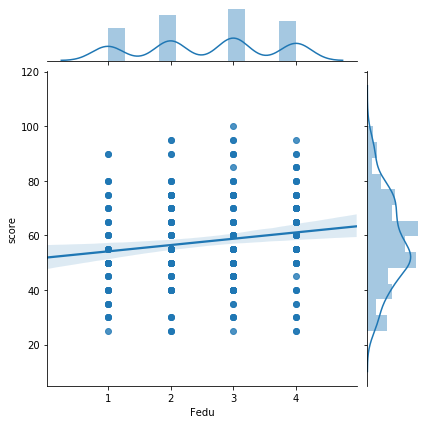

In [66]:
correlation = data[['Fedu', 'score']].corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
print(sns.jointplot(x = 'Fedu', y = 'score', data = data, kind = 'reg'))

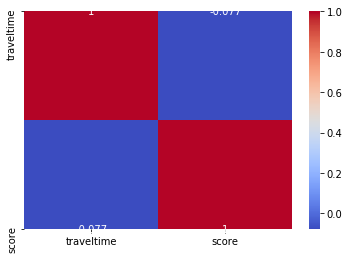

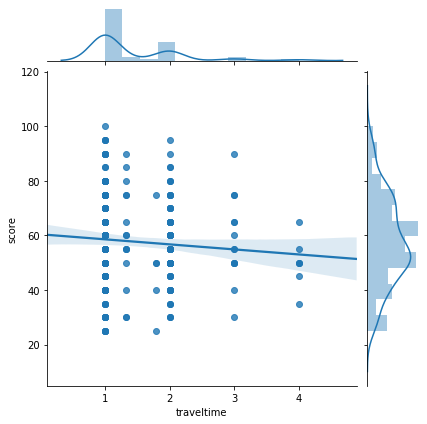

In [67]:
correlation = data[['traveltime', 'score']].corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
print(sns.jointplot(x = 'traveltime', y = 'score', data = data, kind = 'reg'))

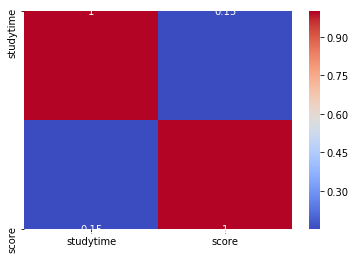

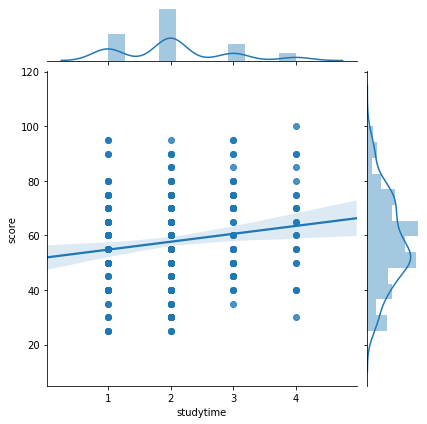

In [68]:
correlation = data[['studytime', 'score']].corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
print(sns.jointplot(x = 'studytime', y = 'score', data = data, kind = 'reg'))

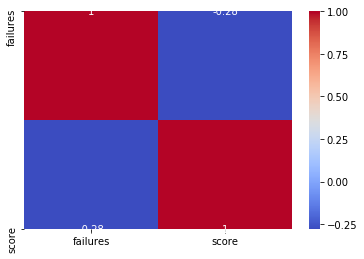

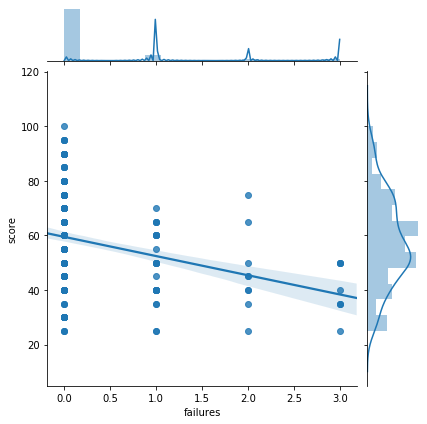

In [69]:
correlation = data[['failures', 'score']].corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
print(sns.jointplot(x = 'failures', y = 'score', data = data, kind = 'reg'))

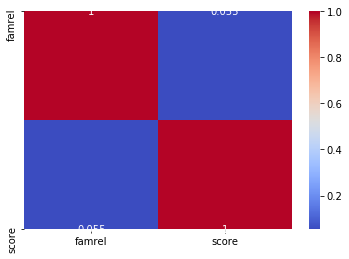

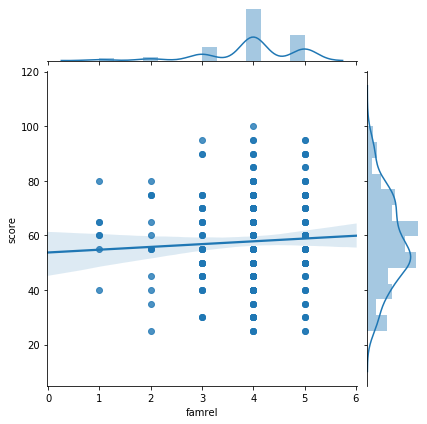

In [70]:
correlation = data[['famrel', 'score']].corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
print(sns.jointplot(x = 'famrel', y = 'score', data = data, kind = 'reg'))

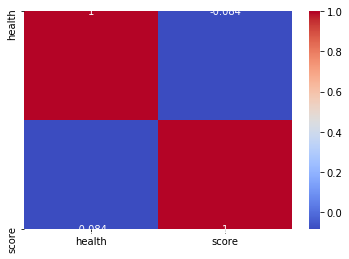

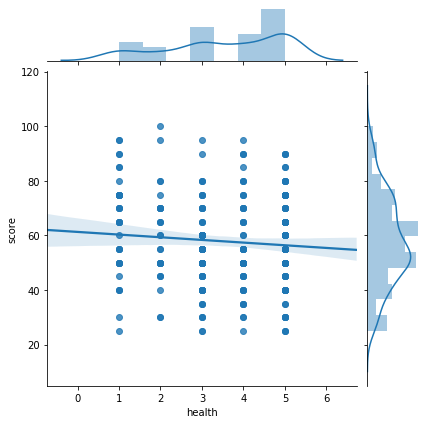

In [71]:
correlation = data[['health', 'score']].corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
print(sns.jointplot(x = 'health', y = 'score', data = data, kind = 'reg'))

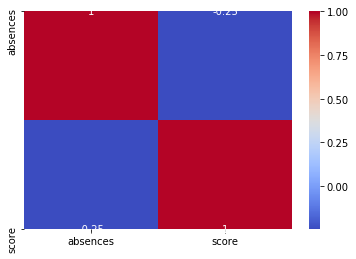

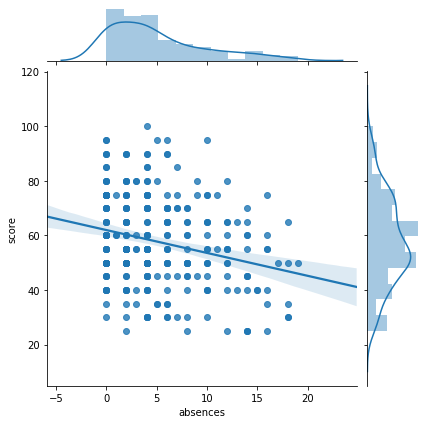

In [72]:
correlation = data[['absences', 'score']].corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
print(sns.jointplot(x = 'absences', y = 'score', data = data, kind = 'reg'))

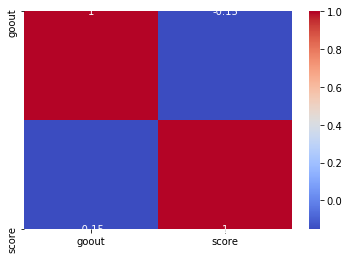

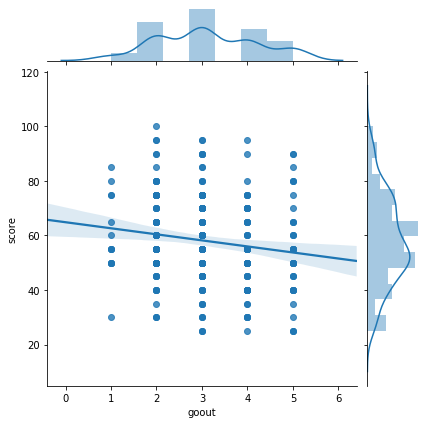

In [73]:
correlation = data[['goout', 'score']].corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
print(sns.jointplot(x = 'goout', y = 'score', data = data, kind = 'reg'))

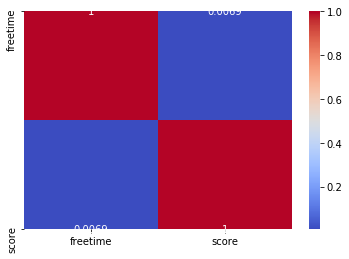

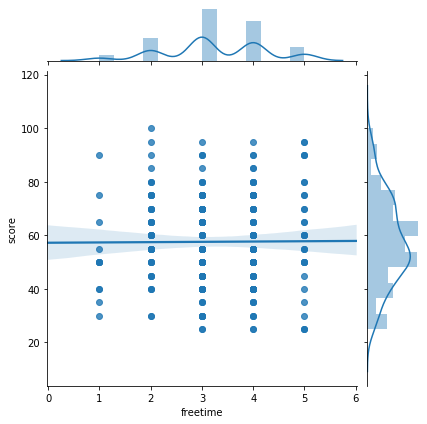

In [74]:
correlation = data[['freetime', 'score']].corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
print(sns.jointplot(x = 'freetime', y = 'score', data = data, kind = 'reg'))

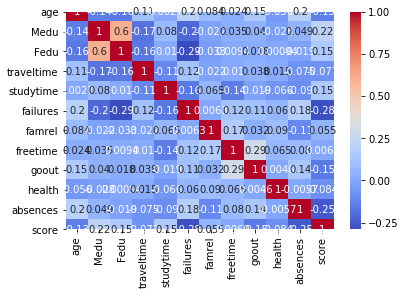

In [75]:
correlation = data.corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

In [76]:
correlation

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.136325,-0.155885,0.110284,0.002659,0.197909,0.084343,0.023685,0.151304,-0.055550,0.195245,-0.134465
Medu,-0.136325,1.000000,0.603446,-0.171306,0.080482,-0.204428,-0.021531,0.034662,0.040302,-0.027976,0.049021,0.218929
Fedu,-0.155885,0.603446,1.000000,-0.155176,0.010204,-0.289909,-0.033327,0.009396,0.018151,0.000942,-0.018728,0.150552
traveltime,0.110284,-0.171306,-0.155176,1.000000,-0.109505,0.117293,-0.022116,0.010088,0.038463,0.015498,-0.074865,-0.076893
studytime,0.002659,0.080482,0.010204,-0.109505,1.000000,-0.158865,0.065248,-0.143910,-0.018714,-0.065974,-0.090100,0.151748
failures,0.197909,-0.204428,-0.289909,0.117293,-0.158865,1.000000,0.006340,0.116182,0.107190,0.060334,0.183759,-0.277784
famrel,0.084343,-0.021531,-0.033327,-0.022116,0.065248,0.006340,1.000000,0.165712,0.032474,0.089942,-0.106403,0.055443
freetime,0.023685,0.034662,0.009396,0.010088,-0.143910,0.116182,0.165712,1.000000,0.294914,0.064900,0.080196,0.006913
goout,0.151304,0.040302,0.018151,0.038463,-0.018714,0.107190,0.032474,0.294914,1.000000,0.004581,0.142440,-0.150185
health,-0.055550,-0.027976,0.000942,0.015498,-0.065974,0.060334,0.089942,0.064900,0.004581,1.000000,-0.005698,-0.084214


Удаляю даные с корреляцией меньше 10%:
traveltime, famrel, freetime, health

In [77]:
data.drop(['famrel'], axis='columns', inplace=True)
data.drop(['traveltime'], axis='columns', inplace=True)
data.drop(['freetime'], axis='columns', inplace=True)
data.drop(['health'], axis='columns', inplace=True)

In [78]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,goout,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,0.0,yes,no,no,no,yes,yes,yes,no,4.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,2.0,0.0,no,yes,no,no,no,yes,yes,no,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,2.0,3.0,yes,no,no,no,yes,yes,yes,no,2.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,2.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,2.0,0.0,no,yes,yes,no,yes,yes,no,no,2.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,course,mother,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,0.0,40.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,1.0,0.0,no,no,no,no,no,yes,yes,no,5.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,mother,1.0,3.0,no,no,no,no,no,yes,no,no,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,1.0,0.0,no,no,no,yes,no,yes,yes,no,1.0,0.0,50.0


In [79]:
correlation = data.corr()
correlation

,age,Medu,Fedu,studytime,failures,goout,absences,score
age,1.000000,-0.136325,-0.155885,0.002659,0.197909,0.151304,0.195245,-0.134465
Medu,-0.136325,1.000000,0.603446,0.080482,-0.204428,0.040302,0.049021,0.218929
Fedu,-0.155885,0.603446,1.000000,0.010204,-0.289909,0.018151,-0.018728,0.150552
studytime,0.002659,0.080482,0.010204,1.000000,-0.158865,-0.018714,-0.090100,0.151748
failures,0.197909,-0.204428,-0.289909,-0.158865,1.000000,0.107190,0.183759,-0.277784
goout,0.151304,0.040302,0.018151,-0.018714,0.107190,1.000000,0.142440,-0.150185
absences,0.195245,0.049021,-0.018728,-0.090100,0.183759,0.142440,1.000000,-0.245122
score,-0.134465,0.218929,0.150552,0.151748,-0.277784,-0.150185,-0.245122,1.000000


Работаю с номативными переменными

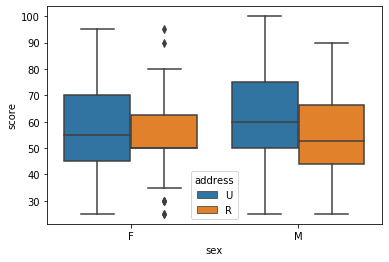

In [80]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'address')

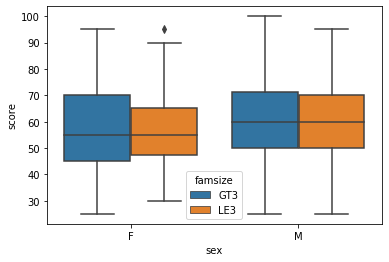

In [81]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'famsize')

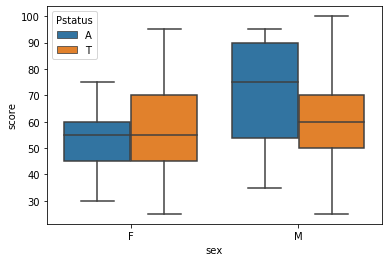

In [82]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'Pstatus')

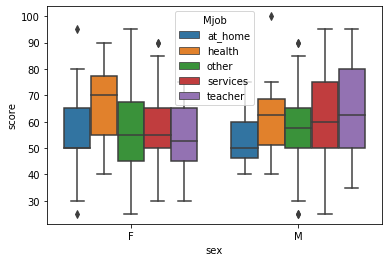

In [83]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'Mjob')

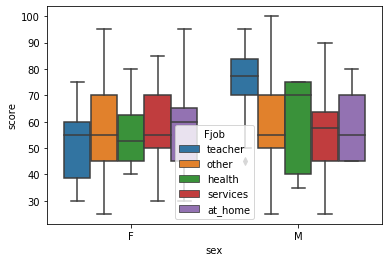

In [84]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'Fjob')

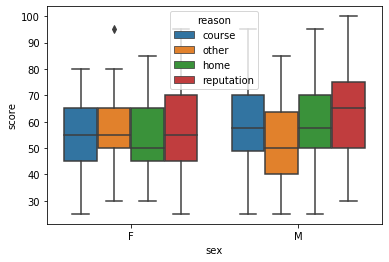

In [85]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'reason')

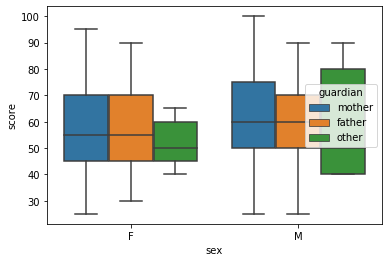

In [86]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'guardian')

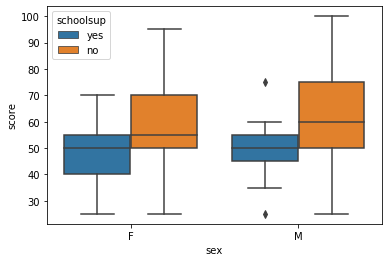

In [87]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'schoolsup')

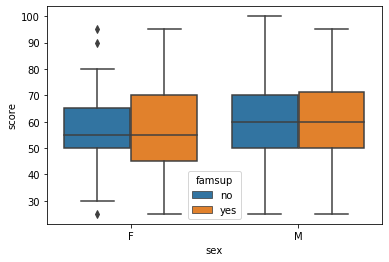

In [88]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'famsup')

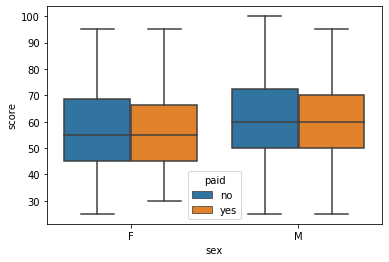

In [89]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'paid')

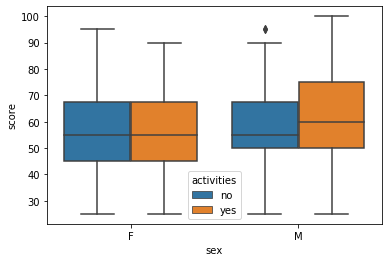

In [90]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'activities')

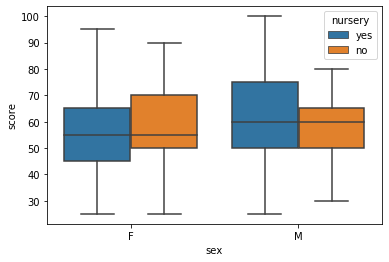

In [91]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'nursery')

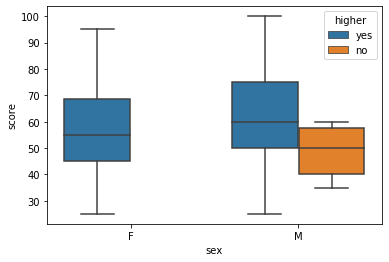

In [92]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'higher')

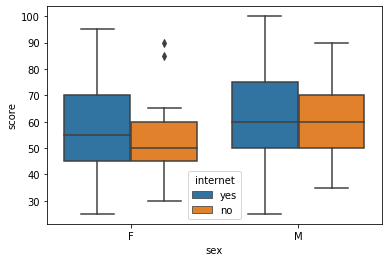

In [93]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'internet')

In [95]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,goout,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,0.0,yes,no,no,no,yes,yes,yes,no,4.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,2.0,0.0,no,yes,no,no,no,yes,yes,no,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,2.0,3.0,yes,no,no,no,yes,yes,yes,no,2.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,2.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,2.0,0.0,no,yes,yes,no,yes,yes,no,no,2.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,course,mother,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,0.0,40.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,1.0,0.0,no,no,no,no,no,yes,yes,no,5.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,mother,1.0,3.0,no,no,no,no,no,yes,no,no,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,1.0,0.0,no,no,no,yes,no,yes,yes,no,1.0,0.0,50.0


## Выбрал учеников с низкими баллами. Хочу посмотреть их отдельно

In [97]:
data_low_score = data[data.score < 40]

,age,Medu,Fedu,studytime,failures,goout,absences,score
age,1.000000,-0.145556,-0.204861,-0.314140,0.206793,0.010942,0.053703,0.094051
Medu,-0.145556,1.000000,0.679015,0.164610,-0.259322,-0.035228,0.155801,0.019166
Fedu,-0.204861,0.679015,1.000000,0.096073,-0.380343,-0.008522,0.104773,-0.146433
studytime,-0.314140,0.164610,0.096073,1.000000,-0.142416,-0.072124,-0.272915,0.238578
failures,0.206793,-0.259322,-0.380343,-0.142416,1.000000,0.261318,-0.163238,0.198979
goout,0.010942,-0.035228,-0.008522,-0.072124,0.261318,1.000000,-0.061354,-0.206090
absences,0.053703,0.155801,0.104773,-0.272915,-0.163238,-0.061354,1.000000,-0.285706
score,0.094051,0.019166,-0.146433,0.238578,0.198979,-0.206090,-0.285706,1.000000


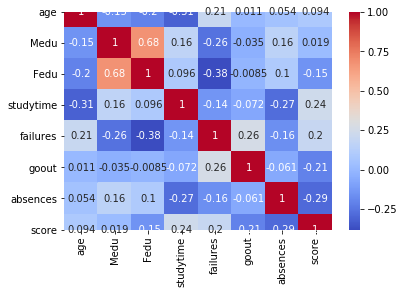

In [98]:
correlation = data_low_score.corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
correlation

Влияние качественных признаков на группу с малыми результатами

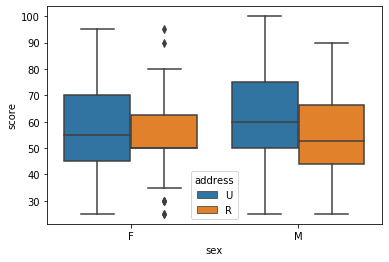

In [100]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'address')

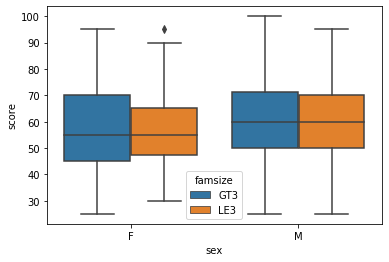

In [101]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'famsize')

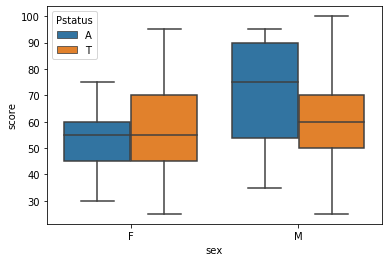

In [102]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'Pstatus')

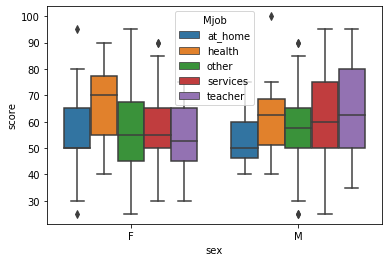

In [103]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'Mjob')

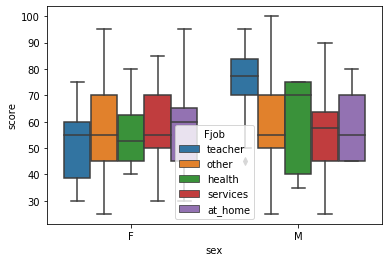

In [104]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'Fjob')

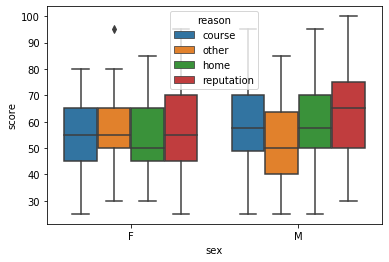

In [105]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'reason')

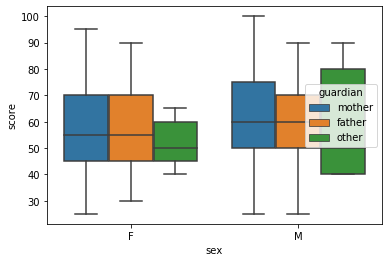

In [106]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'guardian')

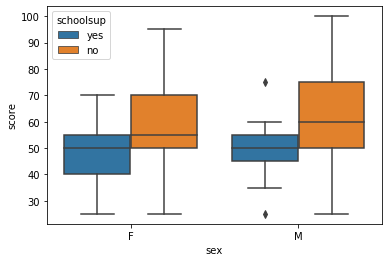

In [107]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'schoolsup')

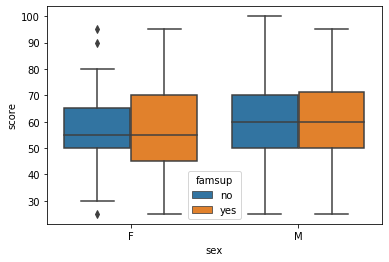

In [108]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'famsup')

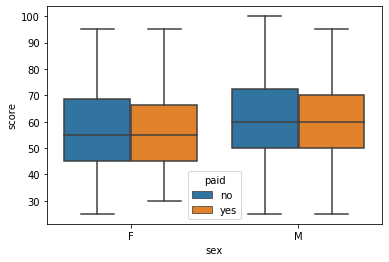

In [109]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'paid')

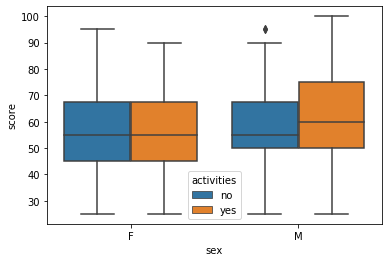

In [110]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'activities')

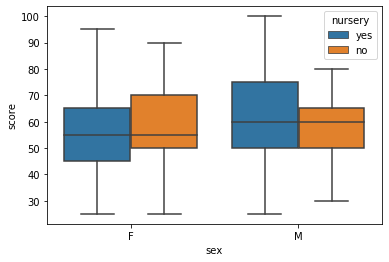

In [111]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'nursery')

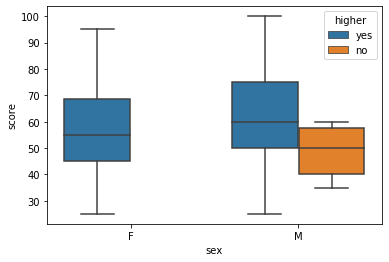

In [112]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'higher')

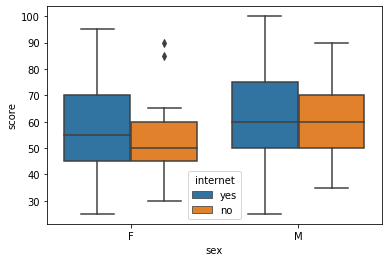

In [113]:
sns.boxplot(x = 'sex', y = 'score', data = data, hue = 'internet')

## Ученики, не явившиеся на экзамен

In [126]:
data_no_score

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,NaN,no,yes,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0
